<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Centrality" data-toc-modified-id="Centrality-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Centrality</a></span><ul class="toc-item"><li><span><a href="#Summary-plotting" data-toc-modified-id="Summary-plotting-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Summary plotting</a></span></li><li><span><a href="#Plotting-network" data-toc-modified-id="Plotting-network-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plotting network</a></span><ul class="toc-item"><li><span><a href="#Which-taxa-are-in-each-community?" data-toc-modified-id="Which-taxa-are-in-each-community?-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Which taxa are in each community?</a></span></li><li><span><a href="#Which-species-are-these-communities-prevalent-in?" data-toc-modified-id="Which-species-are-these-communities-prevalent-in?-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Which species are these communities prevalent in?</a></span></li><li><span><a href="#Which-diet?" data-toc-modified-id="Which-diet?-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Which diet?</a></span></li><li><span><a href="#Which-host-clade-&amp;-diet?" data-toc-modified-id="Which-host-clade-&amp;-diet?-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Which host clade &amp; diet?</a></span></li></ul></li><li><span><a href="#Sub-network-stats" data-toc-modified-id="Sub-network-stats-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Sub-network stats</a></span><ul class="toc-item"><li><span><a href="#Writing-table" data-toc-modified-id="Writing-table-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Writing table</a></span></li></ul></li><li><span><a href="#Sub-network-stability" data-toc-modified-id="Sub-network-stability-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Sub-network stability</a></span><ul class="toc-item"><li><span><a href="#Overall" data-toc-modified-id="Overall-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Overall</a></span></li><li><span><a href="#Removing-nodes" data-toc-modified-id="Removing-nodes-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Removing nodes</a></span></li></ul></li></ul></li><li><span><a href="#LIPA-moran-OTUs" data-toc-modified-id="LIPA-moran-OTUs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>LIPA moran OTUs</a></span><ul class="toc-item"><li><span><a href="#Centrality-score-vs-LIPA" data-toc-modified-id="Centrality-score-vs-LIPA-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Centrality score vs LIPA</a></span></li></ul></li><li><span><a href="#Similarity-of-OTUs-in-each-sub-network" data-toc-modified-id="Similarity-of-OTUs-in-each-sub-network-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Similarity of OTUs in each sub-network</a></span><ul class="toc-item"><li><span><a href="#Branch-length-distribution-per-sub-network" data-toc-modified-id="Branch-length-distribution-per-sub-network-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Branch length distribution per sub-network</a></span><ul class="toc-item"><li><span><a href="#Distribution-null-model" data-toc-modified-id="Distribution-null-model-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Distribution null model</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* calculate network metrics

# Var

In [46]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/assembly/cooccur/'

ntwk_file = '/ebio/abt3_projects/Georg_animal_feces/data/assembly/cooccur//IndD-sens_OTU-binom_ntwk-tbl.RDS'
physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

# LIPA significant OTUs (LIPA on binom-regression--diet residuals)
lipa_res_file = '/ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/taxon_abund//OTU-binom_lipaMoran_IndD_sens_OTU-host-meanCoef-tax.tsv'

# params
threads = 12


# Init

In [103]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)

library(igraph)
library(tidygraph)
library(ggraph)

library(doParallel)

source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [3]:
set.seed(8473)

In [4]:
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/assembly/cooccur/ 


# Load

In [7]:
# loading as tidygraph obj
ntwk = ntwk_file %>%
    readRDS %>%
    as_tbl_graph
ntwk

# A tbl_graph: 408 nodes and 26848 edges
#
# A directed acyclic simple graph with 1 component
#
# Node Data: 408 x 1 (active)
  name                            
  <chr>                           
1 003c4ae8c3fbf5aee27b58e6b7fd5e10
2 01870326c8abb62d307cdd60c70a13ba
3 0206837371f48a70d8103167f4b4204f
4 0215b7637847641274246f9414d2b649
5 02762978080d47774ee6950cfb61f8a9
6 045ca06e5f493a2f85cc8c1a31a0c78e
# ... with 402 more rows
#
# Edge Data: 26,848 x 24
   from    to obs_cooccur prob_cooccur exp_cooccur  q_gt  q_lt sign  Domain.x
  <int> <int>       <dbl>        <dbl>       <dbl> <dbl> <dbl> <chr> <chr>   
1     1     4           0      0.00887        1.12  1        1 0     Bacteria
2     1    20           0      0.00868        1.10  1        1 0     Bacteria
3     1    50           8      0.00812        1.06  0.92     1 0     Bacteria
# ... with 2.684e+04 more rows, and 15 more variables: Phylum.x <chr>,
#   Class.x <chr>, Order.x <chr>, Family.x <chr>, Genus.x <chr>,
#   Species.x <c

In [8]:
# adding taxonomy
## loading 
tax = readRDS(physeq_file) %>%
    tax_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.))

## joining
ntwk = ntwk %>%
    activate(nodes) %>%
    inner_join(tax, c('name'='OTU'))

ntwk

# A tbl_graph: 408 nodes and 26848 edges
#
# A directed acyclic simple graph with 1 component
#
# Node Data: 408 x 8 (active)
  name         Domain  Phylum   Class  Order   Family     Genus   Species      
  <chr>        <fct>   <fct>    <fct>  <fct>   <fct>      <fct>   <fct>        
1 003c4ae8c3f… Bacter… Teneric… Molli… RF9     unculture… ""      ""           
2 01870326c8a… Bacter… Firmicu… Clost… Clostr… Christens… uncult… uncultured b…
3 0206837371f… Bacter… Firmicu… Clost… Clostr… Lachnospi… Pseudo… unclassified 
4 0215b763784… Bacter… Firmicu… Bacil… Lactob… Enterococ… Entero… unclassified 
5 02762978080… Bacter… Firmicu… Clost… Clostr… Ruminococ… uncult… unclassified 
6 045ca06e5f4… Bacter… Firmicu… Clost… Clostr… Ruminococ… uncult… uncultured R…
# ... with 402 more rows
#
# Edge Data: 26,848 x 24
   from    to obs_cooccur prob_cooccur exp_cooccur  q_gt  q_lt sign  Domain.x
  <int> <int>       <dbl>        <dbl>       <dbl> <dbl> <dbl> <chr> <chr>   
1     1     4           0 

In [9]:
# calculating weights based on effects
ntwk = ntwk %>%
    activate(edges) %>%
    mutate(weight = ifelse(effects == 0, 1e-5, abs(effects)))

ntwk

# A tbl_graph: 408 nodes and 26848 edges
#
# A directed acyclic simple graph with 1 component
#
# Edge Data: 26,848 x 25 (active)
   from    to obs_cooccur prob_cooccur exp_cooccur  q_gt  q_lt sign  Domain.x
  <int> <int>       <dbl>        <dbl>       <dbl> <dbl> <dbl> <chr> <chr>   
1     1     4        0         0.00887        1.12  1        1 0     Bacteria
2     1    20        0         0.00868        1.10  1        1 0     Bacteria
3     1    50        8         0.00812        1.06  0.92     1 0     Bacteria
4     1    59        0         0.00825        1.06  1        1 0     Bacteria
5     1    61        3.5       0.008          1     0.99     1 0     Bacteria
6     1    89        7.11      0.00942        1.17  0.36     1 0     Bacteria
# ... with 2.684e+04 more rows, and 16 more variables: Phylum.x <chr>,
#   Class.x <chr>, Order.x <chr>, Family.x <chr>, Genus.x <chr>,
#   Species.x <chr>, Domain.y <chr>, Phylum.y <chr>, Class.y <chr>,
#   Order.y <chr>, Family.y <chr>, Genus.y

In [47]:
# LIPA table
lipa_res = read.delim(lipa_res_file, sep='\t')
lipa_res %>% dfhead

[1] 1172   34


qaccver,Phylum,Class,Order,Family,Genus,pident,Domain_nt,Phylum_nt,Order_nt,⋯,Lepus_tolai,Nyctereutes_procyonoides,Nycticebus_pygmaeus,Panthera_pardus,Papio_ursinus,Pygathrix_nemaeus,Syncerus_caffer,Tamandua_mexicana,Trachypithecus_delacouri,Trachypithecus_hatinhensis
2c56d90477fda1d386971e53faf373f0,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,92.641,Bacteroidetes,Bacteroidia,Bacteroidaceae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2c56d90477fda1d386971e53faf373f0,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,92.641,Bacteroidetes,Bacteroidia,Bacteroidaceae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2c56d90477fda1d386971e53faf373f0,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,93.074,Bacteroidetes,Bacteroidia,unclassified Bacteroidales family,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# Centrality

In [10]:
ntwk = ntwk %>%
    activate(nodes) %>%
    mutate(centrality_btw = centrality_betweenness(weights=weight),
           centrality_hub = centrality_hub(weights=weight),
           centrality_degree = centrality_degree(weights=weight))

ntwk

# A tbl_graph: 408 nodes and 26848 edges
#
# A directed acyclic simple graph with 1 component
#
# Node Data: 408 x 11 (active)
  name     Domain  Phylum  Class  Order Family  Genus  Species   centrality_btw
  <chr>    <fct>   <fct>   <fct>  <fct> <fct>   <fct>  <fct>              <dbl>
1 003c4ae… Bacter… Teneri… Molli… RF9   uncult… ""     ""                   0  
2 0187032… Bacter… Firmic… Clost… Clos… Christ… uncul… uncultur…           24.3
3 0206837… Bacter… Firmic… Clost… Clos… Lachno… Pseud… unclassi…          289  
4 0215b76… Bacter… Firmic… Bacil… Lact… Entero… Enter… unclassi…         3288  
5 0276297… Bacter… Firmic… Clost… Clos… Rumino… uncul… unclassi…            2  
6 045ca06… Bacter… Firmic… Clost… Clos… Rumino… uncul… uncultur…            0  
# ... with 402 more rows, and 2 more variables: centrality_hub <dbl>,
#   centrality_degree <dbl>
#
# Edge Data: 26,848 x 25
   from    to obs_cooccur prob_cooccur exp_cooccur  q_gt  q_lt sign  Domain.x
  <int> <int>       <dbl>     

## Summary plotting

In [11]:
ntwk %>% 
    activate(nodes) %>%
    as.data.frame %>%
    group_by(Domain, Phylum) %>%
    summarize(mean_centrality_btw = mean(centrality_btw),
              mean_centrality_hub = mean(centrality_hub),
              mean_centrality_degree = mean(centrality_degree)) %>%
    ungroup() %>%
    arrange(-mean_centrality_btw)

Domain,Phylum,mean_centrality_btw,mean_centrality_hub,mean_centrality_degree
Bacteria,Bacteroidetes,382.14506,0.30785704,2.7822048
Bacteria,Firmicutes,243.96767,0.18874222,1.6901624
Bacteria,Fusobacteria,119.30556,0.04492999,0.7369061
Bacteria,Proteobacteria,100.39683,0.12642231,2.2982073
Bacteria,Tenericutes,86.12963,0.22304754,1.5230382
Archaea,Euryarchaeota,3.60000,0.25520445,3.5252487
Bacteria,Cyanobacteria,0.75000,0.32978658,2.0408476
Bacteria,Actinobacteria,0.00000,0.01741337,0.2962250
Bacteria,Spirochaetae,0.00000,0.01698151,0.2925043
Bacteria,Verrucomicrobia,0.00000,0.10804056,0.8679999


## Plotting network

In [12]:
ntwk %>%
    activate(edges) %>%
    filter(sign != 0) %>%
    activate(nodes) %>%
    mutate(centrality_btw = centrality_betweenness(weights=weight),
           centrality_hub = centrality_hub(weights=weight),
           centrality_degree = centrality_degree(weights=weight),
           d = local_ave_degree()) %>%
    filter(centrality_btw > 50) %>%
    as.data.frame %>%
    unite(Taxonomy, Phylum, Class, Order, Family, Genus, name, sep=';') %>%
    dplyr::select(Taxonomy, centrality_btw) %>%
    arrange(-centrality_btw) 

Taxonomy,centrality_btw
Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;uncultured;3649f41979b57dd1b1024e1af8c4cf48,865
Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;uncultured;755db830fab43205a73227c522fae2ae,196
Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Incertae Sedis;a01db188e170d6297f7e939e7c73be61,190
Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;unclassified;1762bca6ea3ec08626a56274aba0cbaf,126
Firmicutes;Clostridia;Clostridiales;Clostridiaceae 1;Clostridium sensu stricto 1;e43e0d4862ed1c348011c744457d73a9,112
Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Enterococcus;c1207d1f75219bf4239e39cc5d000435,87
Proteobacteria;Gammaproteobacteria;Enterobacteriales;Enterobacteriaceae;Escherichia-Shigella;66702759d2d292afce742b8b989a6d1d,51


In [13]:
ntwk_f = ntwk %>%
    activate(edges) %>%
    filter(sign != 0) %>%
    activate(nodes) %>%
    mutate(community = as.factor(group_walktrap(weights=weight))) %>%
    mutate(centrality_btw = centrality_betweenness(weights=weight),
           centrality_hub = centrality_hub(weights=weight),
           centrality_degree = centrality_degree(weights=weight),
           d = local_ave_degree()) %>%
    filter(!is.na(d)) 

ntwk_f 

# A tbl_graph: 129 nodes and 241 edges
#
# A directed acyclic simple graph with 2 components
#
# Node Data: 129 x 13 (active)
  name      Domain  Phylum  Class Order  Family  Genus  Species  centrality_btw
  <chr>     <fct>   <fct>   <fct> <fct>  <fct>   <fct>  <fct>             <dbl>
1 02068373… Bacter… Firmic… Clos… Clost… Lachno… Pseud… unclass…              0
2 0215b763… Bacter… Firmic… Baci… Lacto… Entero… Enter… unclass…             14
3 0852e0ca… Bacter… Firmic… Clos… Clost… Rumino… uncla… unclass…              0
4 08d2427e… Bacter… Firmic… Clos… Clost… Rumino… Oscil… uncultu…              0
5 09179c81… Bacter… Firmic… Clos… Clost… Peptos… Incer… unclass…              0
6 09aa18b6… Bacter… Firmic… Clos… Clost… Rumino… uncul… unclass…             13
# ... with 123 more rows, and 4 more variables: centrality_hub <dbl>,
#   centrality_degree <dbl>, community <fct>, d <dbl>
#
# Edge Data: 241 x 25
   from    to obs_cooccur prob_cooccur exp_cooccur  q_gt  q_lt sign  Domain.x
  <int> 

In [14]:
# saving the table
f = file.path(work_dir, 'IndD-sens_OTU-binom_cooccur-ntwk-tbl.txt')
write.table(ntwk_f %>% activate(nodes) %>% as.data.frame,
            file=f, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', f, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/assembly/cooccur//IndD-sens_OTU-binom_cooccur-ntwk-tbl.txt 


Using `nicely` as default layout


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/5_assembly/cooccur/.figures/IndD-sens_OTU-binom_ntwk.pdf 


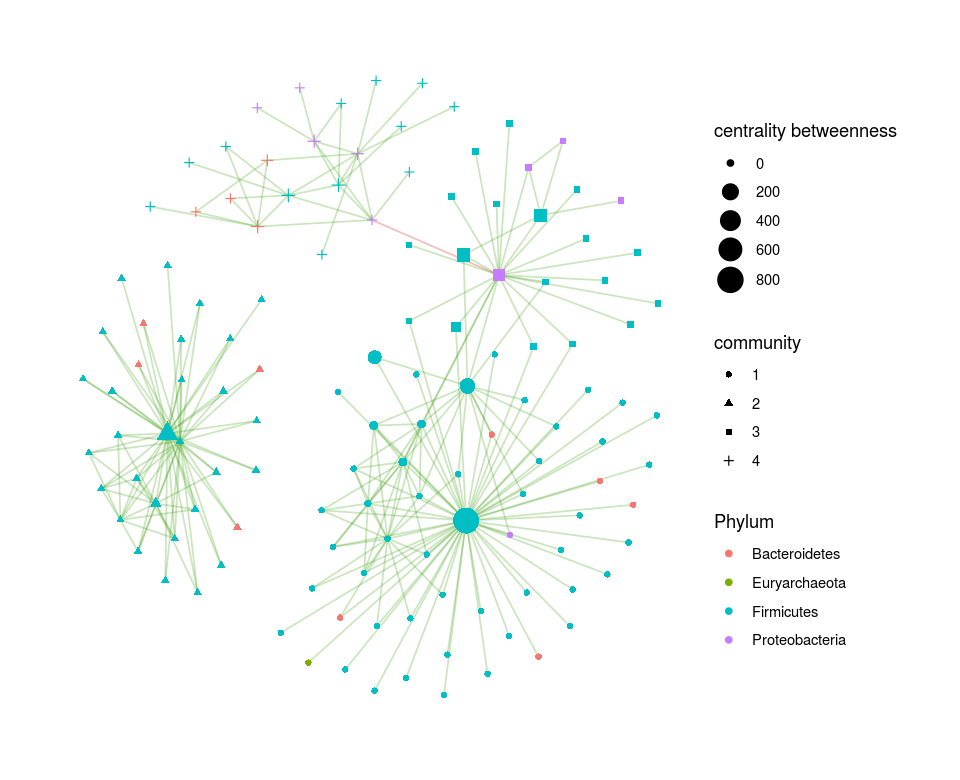

In [15]:
p = ntwk_f %>%
    ggraph(layout = 'auto') + 
    geom_edge_fan(aes(edge_colour=sign), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Phylum, shape=community)) +
    scale_color_discrete('Phylum') +
    scale_size_continuous('centrality betweenness', range=c(1.5,7)) +
    scale_edge_color_manual(values=c('#cc0000', '#339900')) + 
    theme_graph(base_family = 'Helvetica')

options(repr.plot.width=8, repr.plot.height=6.5)
plot_write(p, file='IndD-sens_OTU-binom_ntwk.pdf')

In [16]:
# formatting
df = ntwk_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    unite(Taxonomy, Phylum, Class, Order, Family, Genus, name, sep='; ') %>%
    dplyr::select(Taxonomy, community, centrality_btw) %>%
    filter(centrality_btw > 50) %>%
    arrange(-centrality_btw) %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 20),
           Taxonomy = Taxonomy %>% reorder(centrality_btw))

df 

Taxonomy,community,centrality_btw
Firmicutes; Clostridia; Clostridiales; Ruminococcaceae; uncultured; 3649f41979b57dd1b1024e1af8c4cf48,1,865
Firmicutes; Clostridia; Clostridiales; Ruminococcaceae; uncultured; 755db830fab43205a73227c522fae2ae,2,196
Firmicutes; Clostridia; Clostridiales; Peptostreptococcaceae; Incertae Sedis; a01db188e170d6297f7e939e7c73be61,1,190
Firmicutes; Clostridia; Clostridiales; Peptostreptococcaceae; unclassified; 1762bca6ea3ec08626a56274aba0cbaf,1,126
Firmicutes; Clostridia; Clostridiales; Clostridiaceae 1; Clostridium sensu stricto 1; e43e0d4862ed1c348011c744457d73a9,3,112
Firmicutes; Bacilli; Lactobacillales; Enterococcaceae; Enterococcus; c1207d1f75219bf4239e39cc5d000435,3,87
Proteobacteria; Gammaproteobacteria; Enterobacteriales; Enterobacteriaceae; Escherichia- Shigella; 66702759d2d292afce742b8b989a6d1d,3,51


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/5_assembly/cooccur/.figures/IndD-sens_OTU-binom_top-btw.pdf 


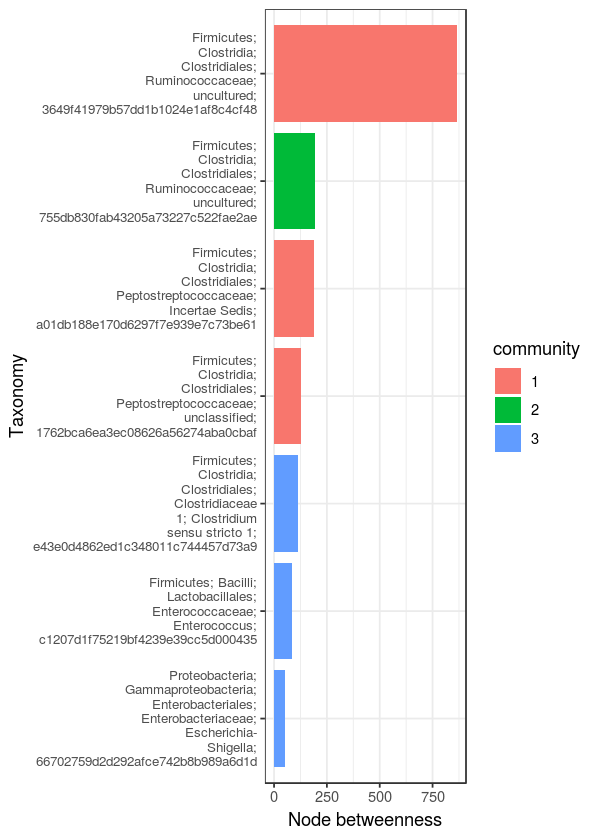

In [17]:
p = ggplot(df, aes(Taxonomy, centrality_btw, fill=community)) +
    geom_bar(stat='identity') +
    labs(y='Node betweenness') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    )

options(repr.plot.width=5, repr.plot.height=7)
plot_write(p, file='IndD-sens_OTU-binom_top-btw.pdf')

### Which taxa are in each community?

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/5_assembly/cooccur/.figures/IndD-sens_OTU-binom_comm-tax.pdf 


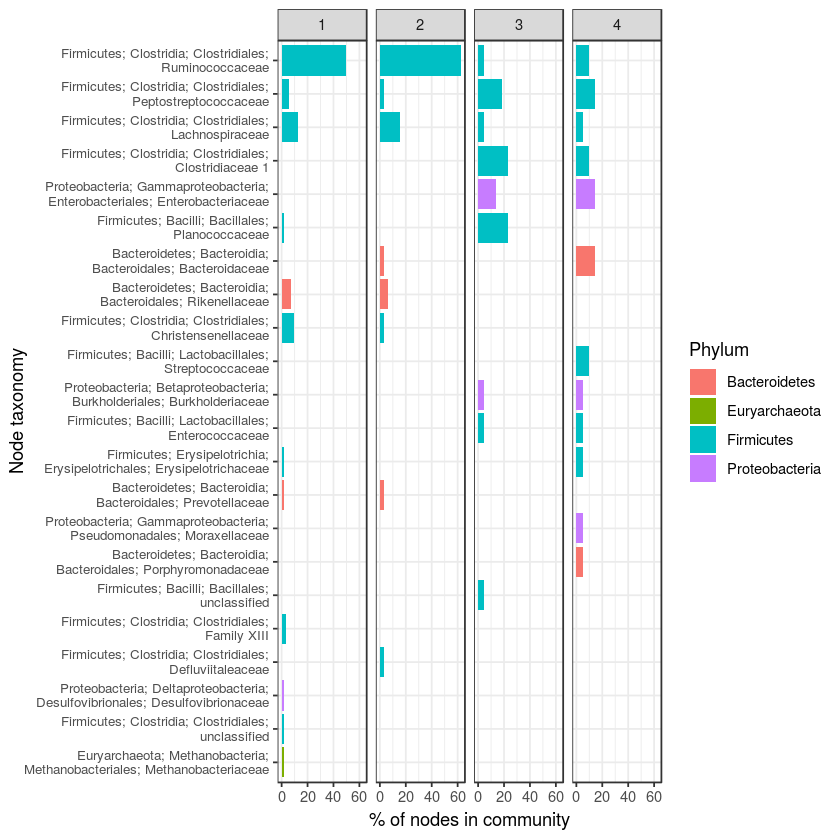

In [18]:
df = ntwk_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    unite(Taxonomy, Phylum, Class, Order, Family, sep='; ', remove=FALSE) %>%
    group_by(community) %>%
    mutate(total_OTUs = n()) %>%
    ungroup() %>%
    group_by(community, Taxonomy, Phylum) %>%
    summarize(n_OTUs = n() / first(total_OTUs) * 100) %>%
    group_by(Taxonomy) %>%
    mutate(sum_n_OTUs = sum(n_OTUs)) %>%
    ungroup() %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 40),
           Taxonomy = Taxonomy %>% reorder(sum_n_OTUs))
    
p = ggplot(df, aes(Taxonomy, n_OTUs, fill=Phylum)) +
    geom_bar(stat='identity') +
    labs(x='Node taxonomy', y='% of nodes in community') +
    facet_grid(. ~ community) +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    )

options(repr.plot.width=7, repr.plot.height=7)
plot_write(p, file='IndD-sens_OTU-binom_comm-tax.pdf')

### Which species are these communities prevalent in?

In [19]:
# node data as df
df_nodes = ntwk_f %>%
    activate(nodes) %>%
    as.data.frame

df_nodes %>% dfhead

[1] 129  13


name,Domain,Phylum,Class,Order,Family,Genus,Species,centrality_btw,centrality_hub,centrality_degree,community,d
0206837371f48a70d8103167f4b4204f,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Pseudobutyrivibrio,unclassified,0,0.000000e+00,0.0000000,2,24.267982
0215b7637847641274246f9414d2b649,Bacteria,Firmicutes,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,unclassified,14,1.288563e-16,0.1012422,4,4.854486
0852e0ca013fdbd32fa5ab232e102b28,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,unclassified,unclassified,0,0.000000e+00,0.0000000,1,61.035148


In [20]:
# otu table with metadata & node data
metadata = readRDS(physeq_file) %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame %>%
    dplyr::select(X.SampleID, class, order, family, genus, 
                  scientific_name, diet, habitat)

otu = readRDS(physeq_file) %>%
    otu_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.)) %>%
    gather(Sample, Count, -OTU) %>%
    group_by(Sample) %>%
    mutate(TOTAL_COUNT = sum(Count)) %>%
    ungroup() %>%
    mutate(Count = Count / TOTAL_COUNT * 100) %>%
    inner_join(df_nodes, c('OTU'='name')) %>%
    inner_join(metadata, c('Sample'='X.SampleID'))

otu %>% dfhead

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”Warning message:
“Column `Sample`/`X.SampleID` joining character vector and factor, coercing into character vector”

[1] 27477    23


OTU,Sample,Count,TOTAL_COUNT,Domain,Phylum,Class,Order,Family,Genus,⋯,centrality_degree,community,d,class,order,family,genus,scientific_name,diet,habitat
d3d51a026150fca2a3400c59a6b311cb,X1.Eurasian.Beaver,0,5000,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,⋯,0.05889063,1,60.840820,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber,herbivore,terrestrial habitat
13fabb2c42c260bd77b4358f429eba6c,X1.Eurasian.Beaver,0,5000,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Burkholderiaceae,Ralstonia,⋯,0.09047656,3,3.954494,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber,herbivore,terrestrial habitat
bfc2bdf08b075d249213e99de23e532c,X1.Eurasian.Beaver,0,5000,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Burkholderiaceae,Ralstonia,⋯,0.44204687,4,6.866499,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber,herbivore,terrestrial habitat


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 24979 rows containing non-finite values (stat_boxplot).”

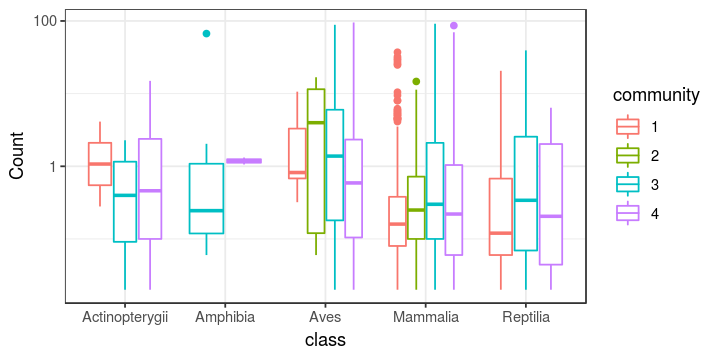

In [21]:
# count distribution
p = ggplot(otu, aes(class, Count, color=community)) +
    geom_boxplot() +
    scale_y_log10() +
    theme_bw()

options(repr.plot.width=6, repr.plot.height=3)
plot(p)

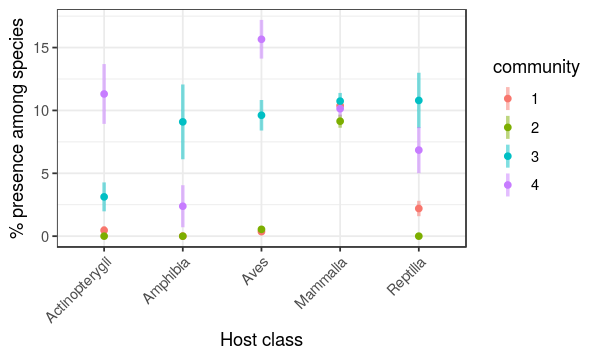

In [22]:
# count distribution
otu_s = otu %>%
    mutate(PA = ifelse(Count > 0, 1, 0)) %>%
    group_by(community, class, scientific_name, OTU) %>%
    summarize(frac_pres = sum(PA) / n() * 100) %>%
    group_by(community, class) %>%
    summarize(mean_frac_pres = mean(frac_pres),
              sd_frac_pres = sd(frac_pres) / sqrt(length(frac_pres))) %>%
    ungroup()

p = ggplot(otu_s, aes(class, mean_frac_pres, color=community)) +
    geom_linerange(aes(ymin=mean_frac_pres-sd_frac_pres,
                       ymax=mean_frac_pres+sd_frac_pres),
                   size=1, alpha=0.5) +
    geom_point() +
    labs(x='Host class', y='% presence among species') +
    theme_bw() +
    theme(
          axis.text.x = element_text(angle=45, hjust=1)
    )

options(repr.plot.width=5, repr.plot.height=3)
plot(p, file='IndD-sens_OTU-binom_class-pres-abs-perc.pdf')

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/5_assembly/cooccur/.figures/IndD-sens_OTU-binom_order-pres-abs-perc.pdf 


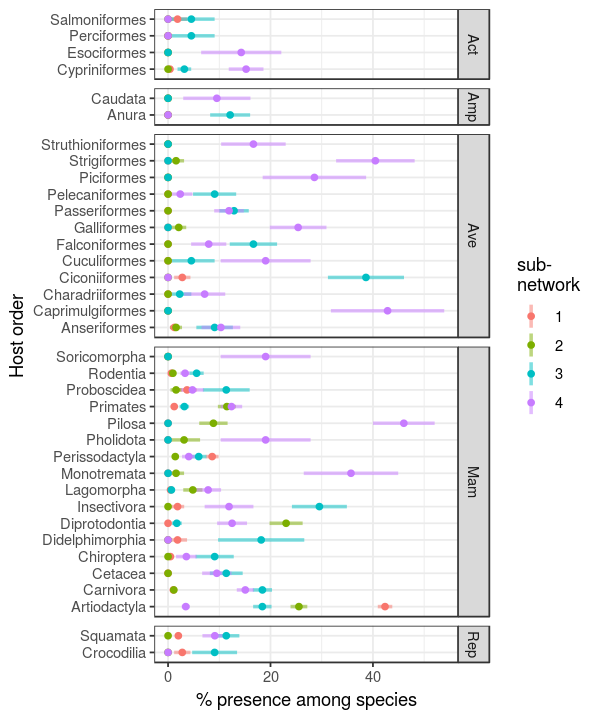

In [23]:
otu_s = otu %>%
    mutate(PA = ifelse(Count > 0, 1, 0)) %>%
    group_by(community, class, order, scientific_name, OTU) %>%
    summarize(frac_pres = sum(PA) / n() * 100) %>%
    group_by(community, class, order) %>%
    summarize(mean_frac_pres = mean(frac_pres),
              sd_frac_pres = sd(frac_pres) / sqrt(length(frac_pres))) %>%
    ungroup() %>%
    mutate(class = gsub('^(.{1,3}).+', '\\1', class))

p = ggplot(otu_s, aes(order, mean_frac_pres, color=community)) +
    geom_linerange(aes(ymin=mean_frac_pres-sd_frac_pres,
                       ymax=mean_frac_pres+sd_frac_pres),
                   size=1, alpha=0.5) +
    geom_point() +
    coord_flip() +
    scale_color_discrete('sub-\nnetwork') +
    facet_grid(class ~ ., scales='free_y', space='free_y') +
    labs(x='Host order', y='% presence among species') +
    theme_bw() 

options(repr.plot.width=5, repr.plot.height=6)
plot_write(p, file='IndD-sens_OTU-binom_order-pres-abs-perc.pdf')

### Which diet?

In [24]:
otu_s = otu %>%
    mutate(PA = ifelse(Count > 0, 1, 0)) %>%
    group_by(community, scientific_name, OTU, diet) %>%
    summarize(frac_pres = sum(PA) / n() * 100) %>%
    group_by(community, diet) %>%
    summarize(mean_frac_pres = mean(frac_pres),
              sd_frac_pres = sd(frac_pres) / sqrt(length(frac_pres))) %>%
    ungroup() %>%
    mutate(diet = factor(diet, levels=c('herbivore', 'omnivore', 'carnivore')))

otu_s %>% dfhead

[1] 12  4


community,diet,mean_frac_pres,sd_frac_pres
1,carnivore,0.7908951,0.1595118
1,herbivore,20.3141534,0.7912403
1,omnivore,0.7793210,0.1633590


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/5_assembly/cooccur/.figures/IndD-sens_OTU-binom_pres-abs-perc_diet.pdf 


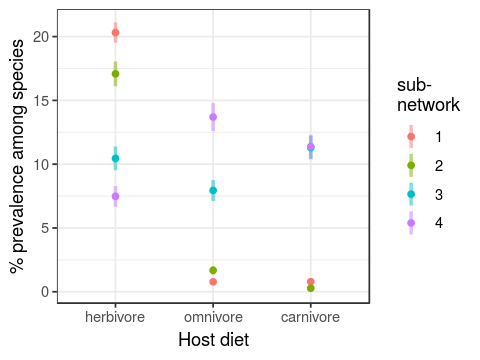

In [25]:
# plotting
p = ggplot(otu_s, aes(diet, mean_frac_pres, color=community)) +
    geom_linerange(aes(ymin=mean_frac_pres-sd_frac_pres,
                       ymax=mean_frac_pres+sd_frac_pres),
                   size=1, alpha=0.5) +
    geom_point() +
    scale_color_discrete('sub-\nnetwork') +
    labs(x='Host diet', y='% prevalence among species') +
    theme_bw() 

options(repr.plot.width=4, repr.plot.height=3)
plot_write(p, file='IndD-sens_OTU-binom_pres-abs-perc_diet.pdf')

### Which host clade & diet?

In [26]:
otu_s = otu %>%
    mutate(PA = ifelse(Count > 0, 1, 0)) %>%
    group_by(community, class, order, scientific_name, OTU, diet) %>%
    summarize(frac_pres = sum(PA) / n() * 100) %>%
    group_by(community, class, order, diet) %>%
    summarize(mean_frac_pres = mean(frac_pres),
              sd_frac_pres = sd(frac_pres) / sqrt(length(frac_pres))) %>%
    ungroup() %>%
    mutate(class = gsub('^(.{1,3}).+', '\\1', class),
           order = order %>% reorder(-(order %>% as.factor %>% as.numeric)),
           diet = factor(diet, levels=c('herbivore', 'omnivore', 'carnivore')))

otu_s %>% dfhead

[1] 180   6


community,class,order,diet,mean_frac_pres,sd_frac_pres
1,Act,Cypriniformes,carnivore,0.9259259,0.9259259
1,Act,Cypriniformes,omnivore,0.0000000,0.0000000
1,Act,Esociformes,carnivore,0.0000000,0.0000000


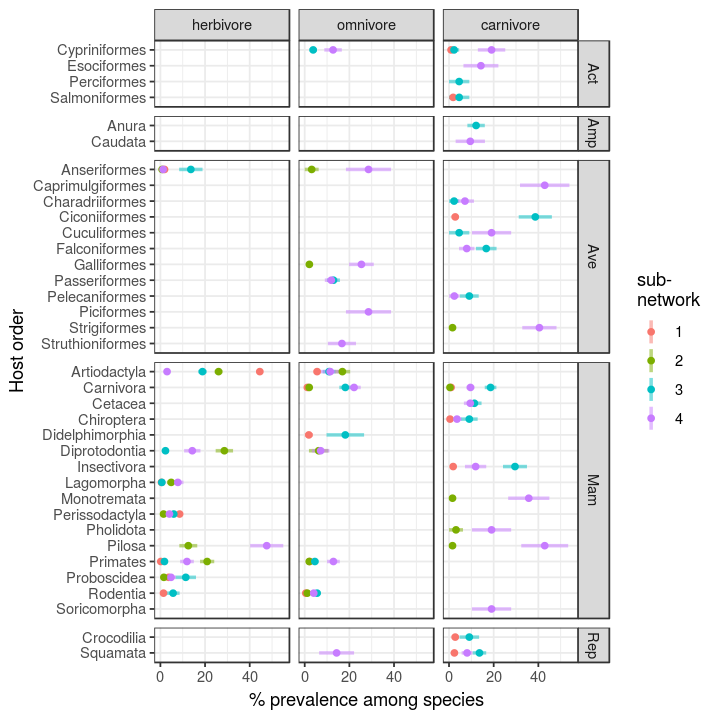

In [27]:
# plotting
p = ggplot(otu_s %>% filter(mean_frac_pres > 0), 
           aes(order, mean_frac_pres, color=community)) +
    geom_linerange(aes(ymin=mean_frac_pres-sd_frac_pres,
                       ymax=mean_frac_pres+sd_frac_pres),
                   size=1, alpha=0.5) +
    geom_point() +
    coord_flip() +
    scale_color_discrete('sub-\nnetwork') +
    facet_grid(class ~ diet, scales='free_y', space='free_y') +
    labs(x='Host order', y='% prevalence among species') +
    theme_bw() 

options(repr.plot.width=6, repr.plot.height=6)
plot(p, file='IndD-sens_OTU-binom_pres-abs-perc_order-diet.pdf')

## Sub-network stats

density = `total edges / all possible edges`

In [28]:
# getting sub-network IDs
comms = ntwk_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    .$community %>%
    unique %>% as.Num 

comms

[1] 2 4 1 3

In [29]:
#' filtering to group; subsampling; calculating network properties
calc_subnetwork = function(commID, g){
    x = g %>%
        activate(nodes) %>%
        filter(community == commID) %>%
        mutate(
               adhesion = graph_adhesion(),
               phylum_assort = graph_assortativity(Phylum, directed = FALSE),
               class_assort = graph_assortativity(Class, directed = FALSE),
               genus_assort = graph_assortativity(Genus, directed = FALSE),
               component_count = graph_component_count(),
               min_cut = graph_min_cut(),
               mean_dist = graph_mean_dist(),
               graph_size = graph_size(),
               graph_order = graph_order(),
               graph_density = graph_size() / (graph_order() * graph_order()),
               edge_density = graph_size() / graph_order(),
               rel_neighbors = mean(centrality_degree() / graph_order()),
               max_centrality = max(centrality_degree()),
               rel_btw = mean(centrality_betweenness() / graph_order())) %>%
        as.data.frame() %>%
        distinct(adhesion, phylum_assort, class_assort, genus_assort, min_cut, 
                 component_count, mean_dist, graph_size, graph_order, 
                 graph_density, edge_density, rel_neighbors, max_centrality, rel_btw)
    x$community = commID
    return(x)
}

In [30]:
# summary by community
comm_stats = lapply(as.list(comms), calc_subnetwork, g=ntwk_f) %>%
    do.call(rbind, .) %>%
    arrange(community)

comm_stats

adhesion,phylum_assort,class_assort,genus_assort,component_count,min_cut,mean_dist,graph_size,graph_order,graph_density,edge_density,rel_neighbors,max_centrality,rel_btw,community
0,-0.04046243,-0.03806702,-0.01245816,1,0,1.902532,99,54,0.03395062,1.833333,0.03395062,22,0.250342936,1
0,-0.05479452,-0.05479452,-0.17605779,1,0,1.730769,77,32,0.07519531,2.406250,0.07519531,29,0.204101562,2
0,-0.75304348,-0.46613546,-0.28571429,1,0,1.111111,24,22,0.04958678,1.090909,0.04958678,19,0.006198347,3
0,0.15477145,0.13660477,-0.02661147,1,0,1.787500,31,21,0.07029478,1.476190,0.07029478,8,0.142857143,4


In [31]:
# formatting
comm_stats_s = comm_stats %>%
    dplyr::select(community, graph_order, graph_density, max_centrality)#, 
                  #phylum_assort, genus_assort)

comm_stats_s

community,graph_order,graph_density,max_centrality
1,54,0.03395062,22
2,32,0.07519531,29
3,22,0.04958678,19
4,21,0.07029478,8


### Writing table

In [32]:
tbl_file = file.path(work_dir, 'IndD-sens_OTU-binom_sub-ntwk_metrics.tsv')
write.table(comm_stats_s, file=tbl_file, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', tbl_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/assembly/cooccur//IndD-sens_OTU-binom_sub-ntwk_metrics.tsv 


## Sub-network stability

### Overall

In [33]:
# getting sub-network IDs
groups = ntwk_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    .$community %>%
    unique %>% as.Num 

groups

[1] 2 4 1 3

In [34]:
# ntwk_f %>%
#     filter(community == 2) %>%
#     ggraph(layout = 'auto') + 
#     geom_edge_fan(aes(edge_colour=sign), show.legend=FALSE, alpha=0.25) + 
#     geom_node_point(aes(color=Phylum, shape=community)) +
#     scale_color_discrete('Phylum') +
#     scale_size_continuous('centrality betweenness', range=c(1.5,7)) +
#     scale_edge_color_manual(values=c('#cc0000', '#339900')) + 
#     theme_graph(base_family = 'Helvetica')

In [35]:
#' filtering to group; subsampling; calculating network properties
calc_subnetwork = function(groupID, g){
    x = g %>%
        activate(nodes) %>%
        filter(community == groupID) %>%
        mutate(adhesion = graph_adhesion(),
               phylum_assort = graph_assortativity(Phylum),
               class_assort = graph_assortativity(Class),
               min_cut = graph_min_cut(),
               mean_dist = graph_mean_dist(),
               rel_neighbors = mean(centrality_degree() / graph_order()),
               rel_btw = mean(centrality_betweenness() / graph_order())) %>%
        as.data.frame() %>%
        distinct(adhesion, phylum_assort, class_assort, min_cut, 
                 mean_dist, rel_neighbors, rel_btw)
    x$community = groupID
    return(x)
}

In [36]:
# summary by community
res = lapply(as.list(groups), calc_subnetwork, g=ntwk_f) %>%
    do.call(rbind, .)

res

adhesion,phylum_assort,class_assort,min_cut,mean_dist,rel_neighbors,rel_btw,community
0,-0.054794521,-0.0547945205,0,1.730769,0.07519531,0.204101562,2
0,0.271092669,0.1953028430,0,1.787500,0.07029478,0.142857143,4
0,-0.015384615,-0.0008791209,0,1.902532,0.03395062,0.250342936,1
0,0.007874016,-0.0534351145,0,1.111111,0.04958678,0.006198347,3


### Removing nodes

In [37]:
# getting sub-network IDs
groups = ntwk_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    .$community %>%
    unique %>% as.Num

groups

[1] 2 4 1 3

In [38]:
# parameters to test
params = expand.grid(groups, rep(1:10) / 10, 1:100)
colnames(params) = c('groupID', 'frac2sample', 'rep')
params %>% dfhead

[1] 4000    3


groupID,frac2sample,rep
2,0.1,1
4,0.1,1
1,0.1,1


In [39]:
#' filtering to group; subsampling; calculating network properties
calc_subnetwork = function(groupID, frac2sample, rep, g){
    g %>%
        activate(nodes) %>%
        filter(community == groupID) %>%
        sample_frac(size = frac2sample, replace=FALSE) %>%
        #mutate(btw = centrality_betweenness() / graph_order(),
        mutate(btw = centrality_degree() / graph_order()) %>%
        as.data.frame() %>%
        .$btw %>% mean  
}

In [40]:
#' running function with all param combinations
params$btw = mapply(calc_subnetwork, 
                    params$groupID, 
                    params$frac2sample, 
                    params$rep,
                    MoreArgs=list(g=ntwk_f))
params %>% dfhead

`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect


`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect


`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect
`.env` is deprecated and no longer has any effect


limit_output extension: Maximum message size of 20000 exceeded with 20050 characters

In [41]:
# summarizing
params_s = params %>%
    group_by(groupID, frac2sample) %>%
    summarize(mean_btw = mean(btw),
              sd_btw = sd(btw)) %>%
    ungroup() %>%
    mutate(frac_removed = 1 - frac2sample,
           groupID = groupID %>% as.character)

params_s %>% dfhead

[1] 40  5


groupID,frac2sample,mean_btw,sd_btw,frac_removed
1,0.1,0.03040000,0.05515671,0.9
1,0.2,0.02876033,0.03473657,0.8
1,0.3,0.03593750,0.03074281,0.7


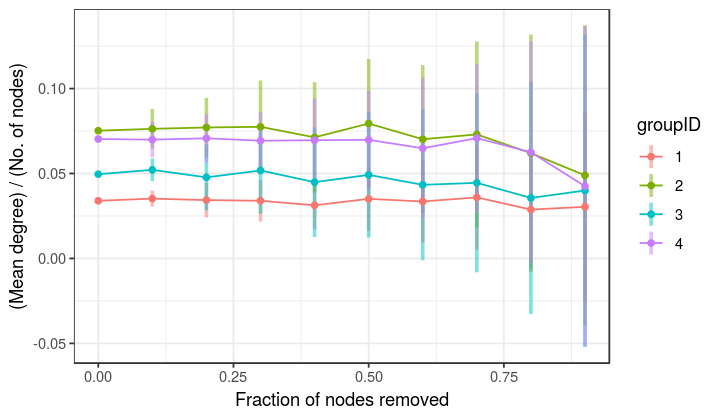

In [42]:
# plotting results
p = ggplot(params_s, aes(frac_removed, mean_btw, color=groupID, group=groupID)) +
    geom_line() +
    geom_linerange(aes(ymin=mean_btw-sd_btw,
                       ymax=mean_btw+sd_btw),
                   size=1, alpha=0.5) +
    geom_point() +
    labs(x='Fraction of nodes removed',
         y='(Mean degree) / (No. of nodes)') +
    theme_bw() 

options(repr.plot.width=6, repr.plot.height=3.5)
plot(p)

# LIPA moran OTUs

In [134]:
lipa_OTUs = lipa_res$qaccver %>% unique 
cat('Number of LIPA OTUs:', lipa_OTUs %>% length, '\n')

Number of LIPA OTUs: 121 


In [135]:
ntwk_f_lipa = ntwk_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    group_by(community) %>%
    mutate(total_OTUs = name %>% unique %>% length) %>%
    ungroup() %>%
    mutate(LIPA = name %in% lipa_OTUs) 

ntwk_f_lipa %>% dfhead

[1] 129  15


name,Domain,Phylum,Class,Order,Family,Genus,Species,centrality_btw,centrality_hub,centrality_degree,community,d,total_OTUs,LIPA
0206837371f48a70d8103167f4b4204f,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Pseudobutyrivibrio,unclassified,0,0.000000e+00,0.0000000,2,24.267982,32,FALSE
0215b7637847641274246f9414d2b649,Bacteria,Firmicutes,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,unclassified,14,1.288563e-16,0.1012422,4,4.854486,21,FALSE
0852e0ca013fdbd32fa5ab232e102b28,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,unclassified,unclassified,0,0.000000e+00,0.0000000,1,61.035148,54,TRUE


In [136]:
ntwk_f_lipa %>%
    group_by(community) %>%
    summarize(comm_n_OTUs = name %>% unique %>% length,
              LIPA_n_OTUs = sum(LIPA)) %>%
    ungroup() %>%
    mutate(perc_LIPA = LIPA_n_OTUs / comm_n_OTUs * 100)

community,comm_n_OTUs,LIPA_n_OTUs,perc_LIPA
1,54,35,64.81481
2,32,4,12.50000
3,22,3,13.63636
4,21,6,28.57143


## Centrality score vs LIPA

In [152]:
lipa_res_s = lipa_res[,c(1,14:ncol(lipa_res))] %>%
    gather(Sample, LIPA_score, -qaccver) %>%
    filter(!is.na(LIPA_score)) %>%
    group_by(qaccver) %>%
    summarize(mean_LIPA_score = mean(LIPA_score),
              max_LIPA_score = max(LIPA_score)) %>%
    ungroup() 

lipa_res_s %>% dfhead

[1] 121   3


qaccver,mean_LIPA_score,max_LIPA_score
02762978080d47774ee6950cfb61f8a9,1.7332944,1.7332944
0852e0ca013fdbd32fa5ab232e102b28,0.8511986,0.9408041
08d2427e344e1c3fa385921c699896e2,0.7697018,1.1459827


In [153]:
# adding LIPA scores
ntwk_f_j = ntwk_f %>%
    activate(nodes) %>%
    mutate(centrality = centrality_degree()) %>%
    as.data.frame %>%
    group_by(community) %>%
    left_join(lipa_res_s, c('name'='qaccver')) 

ntwk_f_j %>% dfhead

Warning message:
“Column `name`/`qaccver` joining character vector and factor, coercing into character vector”

[1] 129  16


name,Domain,Phylum,Class,Order,Family,Genus,Species,centrality_btw,centrality_hub,centrality_degree,community,d,centrality,mean_LIPA_score,max_LIPA_score
0206837371f48a70d8103167f4b4204f,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Pseudobutyrivibrio,unclassified,0,0.000000e+00,0.0000000,2,24.267982,0,NA,NA
0215b7637847641274246f9414d2b649,Bacteria,Firmicutes,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,unclassified,14,1.288563e-16,0.1012422,4,4.854486,2,NA,NA
0852e0ca013fdbd32fa5ab232e102b28,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,unclassified,unclassified,0,0.000000e+00,0.0000000,1,61.035148,0,0.8511986,0.9408041


In [173]:
# LIPA scores for "hub" taxa
ntwk_f_j_s = ntwk_f_j %>%
    group_by(community) %>%
    mutate(MAX = max(centrality_btw)) %>%
    ungroup() %>%
    filter(centrality_btw == MAX) %>%
    dplyr::select(name, Phylum, Class, Order, Family, Genus, 
                  centrality_btw, community, mean_LIPA_score) %>%
    arrange(community)

ntwk_f_j_s

name,Phylum,Class,Order,Family,Genus,centrality_btw,community,mean_LIPA_score
3649f41979b57dd1b1024e1af8c4cf48,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822
755db830fab43205a73227c522fae2ae,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,196,2,NA
e43e0d4862ed1c348011c744457d73a9,Firmicutes,Clostridia,Clostridiales,Clostridiaceae 1,Clostridium sensu stricto 1,112,3,NA
948b736780192bc98be57458bdb5d6ef,Firmicutes,Clostridia,Clostridiales,Clostridiaceae 1,Clostridium sensu stricto 1,16,4,NA


In [175]:
# BLAST taxonomy of hub OTUs
lipa_res %>% 
    dplyr::select(qaccver, Family_nt, Genus_nt) %>%
    inner_join(ntwk_f_j_s, c('qaccver'='name'))

Warning message:
“Column `qaccver`/`name` joining factor and character vector, coercing into character vector”

qaccver,Family_nt,Genus_nt,Phylum,Class,Order,Family,Genus,centrality_btw,community,mean_LIPA_score
3649f41979b57dd1b1024e1af8c4cf48,unclassified Lachnospiraceae genus,uncultured Lachnospiraceae bacterium,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822
3649f41979b57dd1b1024e1af8c4cf48,unclassified Ruminococcaceae genus,uncultured Ruminococcaceae bacterium,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822
3649f41979b57dd1b1024e1af8c4cf48,unclassified Ruminococcaceae genus,uncultured Ruminococcaceae bacterium,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822
3649f41979b57dd1b1024e1af8c4cf48,Oscillibacter,uncultured Oscillibacter sp.,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822
3649f41979b57dd1b1024e1af8c4cf48,Oscillibacter,uncultured Oscillibacter sp.,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822
3649f41979b57dd1b1024e1af8c4cf48,Oscillibacter,uncultured Oscillibacter sp.,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822
3649f41979b57dd1b1024e1af8c4cf48,unclassified Ruminococcaceae genus,uncultured Ruminococcaceae bacterium,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822
3649f41979b57dd1b1024e1af8c4cf48,unclassified Ruminococcaceae genus,uncultured Ruminococcaceae bacterium,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822
3649f41979b57dd1b1024e1af8c4cf48,unclassified Ruminococcaceae genus,uncultured Ruminococcaceae bacterium,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822
3649f41979b57dd1b1024e1af8c4cf48,Oscillibacter,uncultured Oscillibacter sp.,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,865,1,0.9666822


Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 81 rows containing missing values (geom_point).”

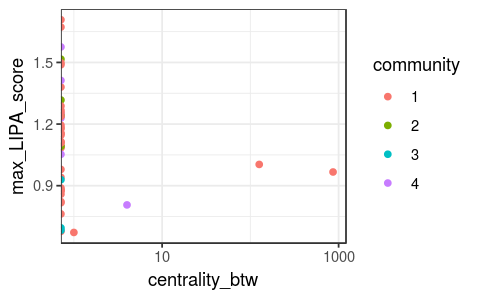

In [169]:
ggplot(ntwk_f_j, aes(centrality_btw, max_LIPA_score, color=community)) +
    geom_point() +
    scale_x_log10() +
    theme_bw()

# Similarity of OTUs in each sub-network

## Branch length distribution per sub-network

In [67]:
# OTUs for each community
OTUs = ntwk_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    distinct(name, community) %>%
    arrange(community)

OTUs %>% head

name,community
0852e0ca013fdbd32fa5ab232e102b28,1
08d2427e344e1c3fa385921c699896e2,1
0b2c7ceaa6ee285369346a6e35daf01a,1
0da2baec7cd57d31ce44b97649b50cb3,1
0e65da6a36b589fbd59a496e5dab4ffd,1
16035ba99215a60e5d21eadc1608e4d8,1


In [73]:
# getting sub-tree (16S) of all OTUs
tree = readRDS(physeq_file) %>%
    phy_tree 

to_rm = setdiff(tree$tip.label, OTUs$name %>% unique)
tree = ape::drop.tip(tree, to_rm)
tree


Phylogenetic tree with 129 tips and 128 internal nodes.

Tip labels:
	d3d51a026150fca2a3400c59a6b311cb, 13fabb2c42c260bd77b4358f429eba6c, bfc2bdf08b075d249213e99de23e532c, ab6bc0116bcfefcbeb981d83cd525034, 66702759d2d292afce742b8b989a6d1d, c134e69861043a499678733111890f62, ...
Node labels:
	0.435, 0.812, 0.971, 0.807, 0.938, 0.914, ...

Rooted; includes branch lengths.

In [76]:
# getting distance mtx 
tree_mtx = cophenetic(tree) 
tree_mtx %>% dim

[1] 129 129

In [82]:
# foreach community (sub-network), get distribution of branch lengths
get_tree_brlens = function(community_ID, tree_mtx, OTUs){
    x = OTUs %>%
        filter(community==community_ID) %>%
        .$name %>% unique
    y = tree_mtx[x,x] %>% as.dist %>% as.vector
    y = data.frame(community = community_ID, brlens = y)
    return(y)
}

comms = OTUs$community %>% unique
df_brlens = lapply(as.list(comms), get_tree_brlens, tree_mtx=tree_mtx, OTUs=OTUs) %>%
    do.call(rbind, .) 

df_brlens %>% dfhead

[1] 2368    2


community,brlens
1,0.2207169
1,1.2167518
1,0.2166462


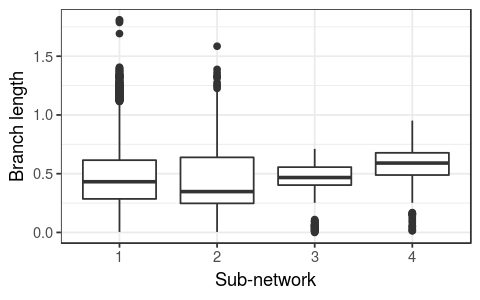

In [85]:
p = ggplot(df_brlens, aes(community, brlens)) +
    geom_boxplot() +
    labs(x='Sub-network', y='Branch length') +
    theme_bw()

options(repr.plot.width=4, repr.plot.height=2.5)
plot(p)

### Distribution null model

* similar findings if the OTUs are randomly selected from the entire community?

In [105]:
# randomly creating new sub-networks
null_subnetworks = function(rep, OTUs, physeq_file){
    all_OTUs = readRDS(physeq_file) %>% taxa_names
    n_OTUs = OTUs %>% nrow
    OTUs_null = data.frame(name = sample(all_OTUs, n_OTUs),
                           community = OTUs$community) 

    # getting sub-tree (16S) of all OTUs
    tree = readRDS(physeq_file) %>%
        phy_tree 

    to_rm = setdiff(tree$tip.label, OTUs_null$name %>% unique)
    tree = ape::drop.tip(tree, to_rm)

    # getting distance mtx 
    tree_mtx = cophenetic(tree)

    # getting branch lengths
    comms = OTUs_null$community %>% unique
    df_brlens = lapply(as.list(comms), get_tree_brlens, tree_mtx=tree_mtx, OTUs=OTUs_null) %>%
        do.call(rbind, .) 
    df_brlens$rep = rep
    
    return(df_brlens)
}

# running null model simulations in parallel
doParallel::registerDoParallel(threads)
reps = as.list(1:100)
df_null = plyr::llply(reps, null_subnetworks, 
                      OTUs=OTUs, 
                      physeq_file=physeq_file,
                      .parallel=TRUE) %>%
    do.call(rbind, .)

df_null %>% dfhead

[1] 236800      3


community,brlens,rep
1,0.7434304,1
1,0.9187215,1
1,0.7153266,1


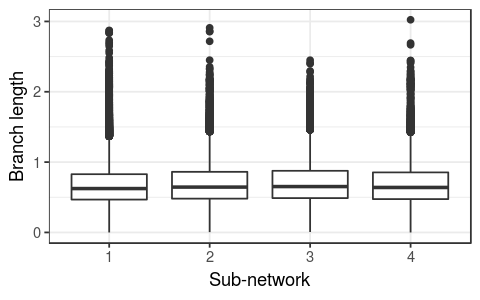

In [106]:
# distribution of values
p = ggplot(df_null, aes(community, brlens)) +
    geom_boxplot() +
    labs(x='Sub-network', y='Branch length') +
    theme_bw()

options(repr.plot.width=4, repr.plot.height=2.5)
plot(p) 

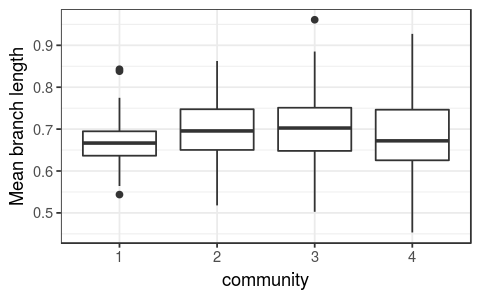

In [110]:
# mean branch length
df_null %>%
    group_by(community, rep) %>%
    summarize(mean_brlen = mean(brlens)) %>%
    ungroup() %>%
    ggplot(aes(community, mean_brlen)) +
        geom_boxplot() +
        labs(y='Mean branch length') +
        theme_bw() 

# sessionInfo

In [43]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq_eco/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq_eco/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2  ggraph_1.0.2    tidygraph_1.1.0 igraph_1.2.1   
[5] phyloseq_1.22.3 ggplot2_3.0.0   tidyr_0.8.1     dplyr_0.7.6    

loaded via a namespace (and not attached):
 [1] Biobase_2.38.0      viridis_0.5.1       viridisLite_0.3.0  
 [4] jsonlite_1.5        splines_3.4.1       foreach_1.4.4      
 [7] assertthat_0.2.0    stats4_3.4.1        ggrepel_0.8.0      
[10] pillar_1.2.2        lattice_0.20-34     glue_1.3.0         
[13] uuid_0.1-2          digest_0.6.15       XVector_0.18.0     
[16] colorspace_1.3-2    